In [15]:
# Imports
from utilities import showStaticMap, getColoredInitialMap, getBinaryInitialMap, getInitialRobotPose, showAnimatedMap
from utilities import  getRays, getLikelihood
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import matplotlib.animation as animation
from tqdm import tqdm


In [16]:
# Constants
LASER_ANGLE_RANGE = 125 # to the left and the right(in degrees)
NUMBER_OF_LASER_RAYS = 2 * LASER_ANGLE_RANGE // 2 # 2 degrees per ray
LASER_MAX_RANGE = 1200//4 # (in pixels)
PIXEL_WIDTH = 4
PIXEL_HIGHT = 4
MAP_SIZE = (400, 680) # where the first dimension if for the y-axis and the second dimension (in pixels)

# Get the laser beams based on the robot pose in the map

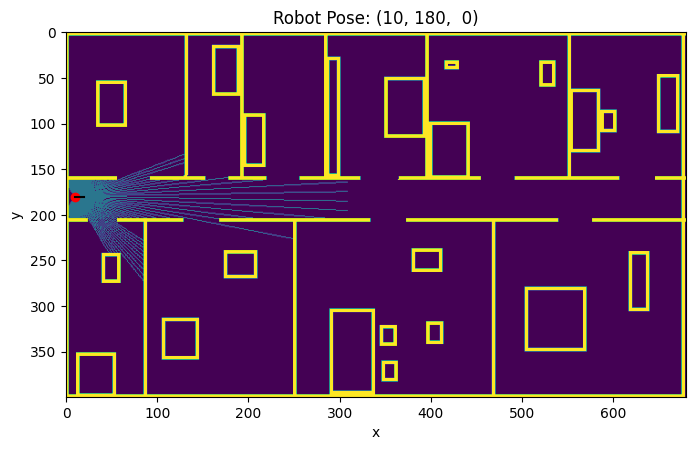

In [17]:
showStaticMap(getColoredInitialMap(), getInitialRobotPose())

In [24]:
rays = getRays(getColoredInitialMap(), (20, 20, 0))
print(rays)
# output the measurements to measurements.txt
np.savetxt('measurements.txt', rays, fmt='%d')

[20, 20, 19, 19, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 24, 25, 26, 27, 28, 30, 32, 34, 36, 38, 41, 45, 50, 55, 62, 72, 84, 103, 111, 111, 111, 111, 111, 111, 111, 111, 112, 113, 113, 114, 116, 117, 118, 120, 122, 124, 126, 129, 132, 135, 55, 53, 51, 49, 47, 46, 44, 43, 42, 41, 40, 39, 38, 38, 37, 36, 37, 40, 45, 51, 58, 69, 84, 140, 139, 139, 139, 139, 139, 139, 140, 109, 90, 76, 66, 59, 53, 48, 44, 41, 38, 36, 34, 32]


In [19]:
likelihood = getLikelihood(getBinaryInitialMap(), rays)

Calculating Likelihood: 100%|██████████| 200/200 [18:41<00:00,  5.61s/it]


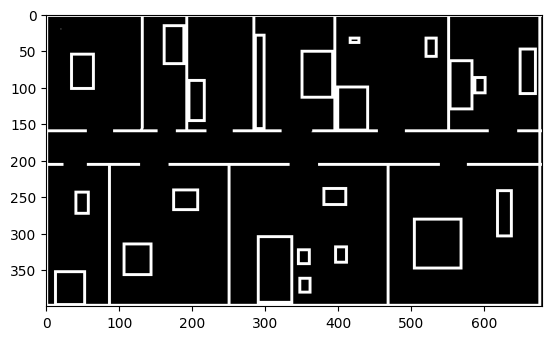

In [34]:
plt.imshow(likelihood, cmap='gray')
plt.show()
newLikelihood = likelihood 
for x in range(likelihood.shape[0]):
    for y in range(likelihood.shape[1]):
        if newLikelihood[x, y] != 1 and newLikelihood[x, y] != 0:
            print("Point", x, y, " with prob",  newLikelihood[x, y])


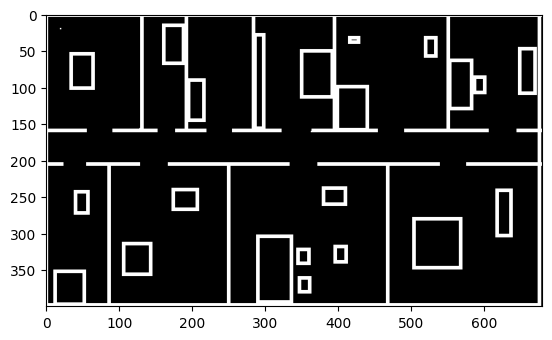

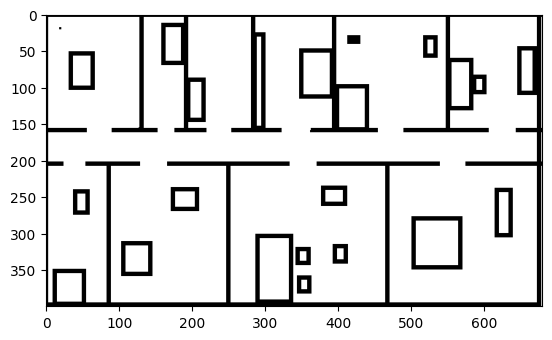

In [23]:
from skimage.morphology import dilation, erosion 
kernel = np.ones((2,2),np.uint8)

# apply dilation the map with a nxn kernel using skimage
newLikelihood = dilation(newLikelihood, kernel)
plt.imshow(newLikelihood, cmap='gray')
plt.show()
# apply erosion to the map with a nxn kernel using skimage
newLikelihood = erosion(1 - newLikelihood, kernel)
plt.imshow(newLikelihood, cmap='gray')
plt.show()

(4, 3)


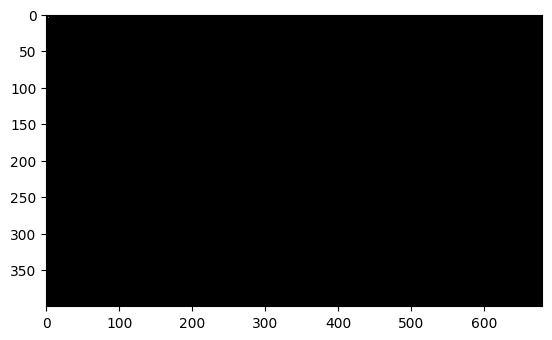

In [29]:
# Show the point with the highest likelihood
maxIndex = np.argmax(newLikelihood)
maxIndex = np.unravel_index(maxIndex, newLikelihood.shape)
print(maxIndex)
# Display the map with the highest likelihood
highestLikelihoodMap = np.zeros(newLikelihood.shape) 
highestLikelihoodMap[maxIndex] = 1
plt.imshow(highestLikelihoodMap, cmap='gray')